In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
breast = datasets.load_breast_cancer(as_frame=True)
cancer = breast.frame
cancer.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
262,17.290,22.13,114.40,947.8,0.08999,0.12730,0.09697,0.07507,0.2108,0.05464,...,27.24,137.90,1295.0,0.11340,0.2867,0.22980,0.15280,0.3067,0.07484,0
397,12.800,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.04083,0.1574,0.05750,...,21.06,90.72,591.0,0.09534,0.1812,0.19010,0.08296,0.1988,0.07053,1
430,14.900,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,0.2041,0.06898,...,27.57,125.40,832.7,0.14190,0.7090,0.90190,0.24750,0.2866,0.11550,0
454,12.620,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,22.15,91.62,633.5,0.12250,0.1517,0.18870,0.09851,0.3270,0.07330,1
468,17.600,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.10020,0.1696,0.07369,...,28.87,143.60,1437.0,0.12070,0.4785,0.51650,0.19960,0.2301,0.12240,0
459,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,0.1621,0.05952,...,36.92,68.03,349.9,0.11100,0.1109,0.07190,0.04866,0.2321,0.07211,1
212,28.110,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,0.1648,0.05525,...,18.47,188.50,2499.0,0.11420,0.1516,0.32010,0.15950,0.1648,0.05525,0
169,14.970,16.95,96.22,685.9,0.09855,0.07885,0.02602,0.03781,0.1780,0.05650,...,23.00,104.60,793.7,0.12160,0.1637,0.06648,0.08485,0.2404,0.06428,1
393,21.610,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.15620,0.2162,0.06606,...,28.74,172.00,2081.0,0.15020,0.5717,0.70530,0.24220,0.3828,0.10070,0
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,22.65,65.50,324.7,0.14820,0.4365,1.25200,0.17500,0.4228,0.11750,1


In [3]:
X = cancer['mean area']
Y = cancer['mean perimeter']

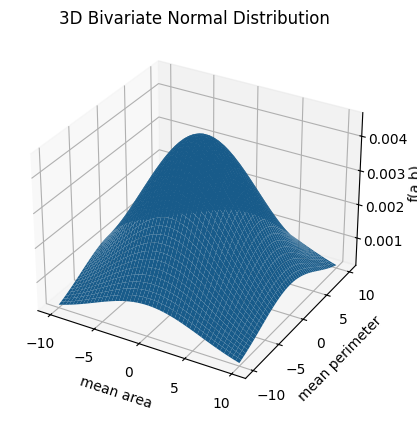

In [9]:
def calculating_biv(X, Y):
  x_values = np.array(X)
  y_values = np.array(Y)

  mu_x = np.mean(x_values)
  mu_y = np.mean(y_values)

  sigma_x = np.std(x_values, ddof=0)
  sigma_y = np.std(y_values, ddof=0)

  cov_xy = np.mean((x_values - mu_x)*(y_values - mu_y))
  p = cov_xy/(sigma_x*sigma_y)

  z_x = (X - mu_x)/sigma_x
  z_y = (Y - mu_y)/sigma_y



  exponent = np.exp(-(1/(2 * (1 - p ** 2)) * (z_x ** 2 - 2 * p * z_x * z_y + z_y ** 2)))
  mnm = 2 * np.pi * sigma_x * sigma_y * np.sqrt(1 - p ** 2)

  return exponent / mnm

a = np.linspace(-10, 10, 50)
b = np.linspace(-10, 10, 50)
A,B = np.meshgrid(a, b)

Z = calculating_biv(A, B)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, Z)

ax.set_xlabel('mean area')
ax.set_ylabel('mean perimeter')
ax.set_zlabel('f(a,b)')
ax.set_title('3D Bivariate Normal Distribution')
plt.show()